In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
baseline = 0.2
mde = 0.05
sample_size = 1030

In [5]:
np.random.binomial(1, baseline, size=100)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [10]:
a = np.random.binomial(1, baseline, size=sample_size)

In [11]:
a.mean()

0.19902912621359223

In [16]:
b = np.random.binomial(1, baseline+mde, size=sample_size)

In [17]:
b.mean()

0.25922330097087376

Z-тест

In [18]:
from statsmodels.stats.proportion import proportions_ztest

H0: Разницы между группа нет (выборки пришли из одного распределения)

H1: Разница между группа есть (выборки пришли из разных распределений)

In [19]:
proportions_ztest([a.sum(), b.sum()], [len(a), len(b)])

(-3.2503419371581432, 0.001152663241694819)

Метод Монте-Карло

In [20]:
result = []
for _ in tqdm(range(100_000)):
    a = np.random.binomial(1, baseline, size=sample_size)
    b = np.random.binomial(1, baseline+mde, size=sample_size)
    _, pval = proportions_ztest([a.sum(), b.sum()], [len(a), len(b)])
    result.append(pval)

100%|██████████| 100000/100000 [00:29<00:00, 3422.74it/s]


In [21]:
result[:10]

[0.010901297349445095,
 4.394968031694123e-05,
 0.0001138229794646382,
 0.26985524567533425,
 0.00415983921842665,
 0.01896536070249635,
 2.450841892637025e-06,
 0.013401941406307133,
 0.00022060946857039134,
 0.08247091943113381]

In [22]:
experiment = pd.Series(result)

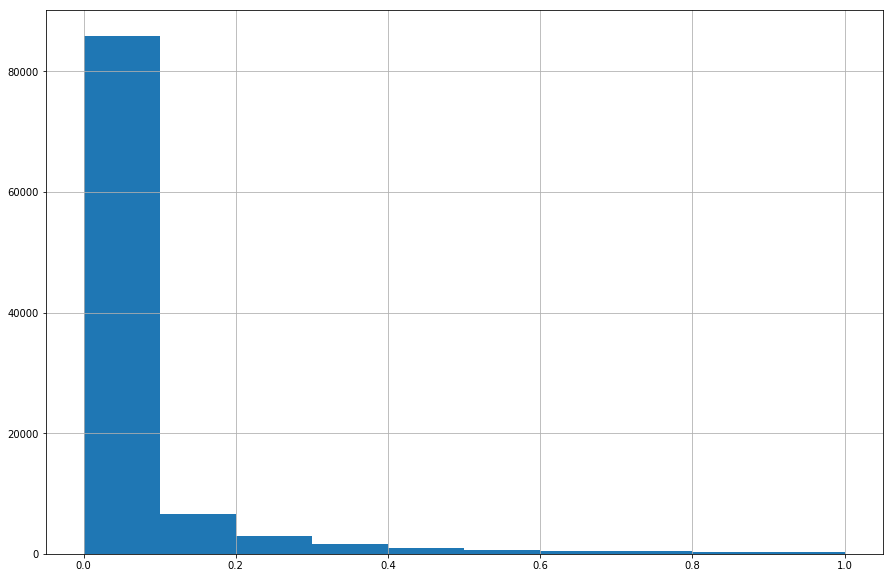

In [23]:
plt.figure(figsize=(15, 10))
experiment.hist();

In [24]:
(experiment < 0.05).mean()

0.77723

T-тест

In [25]:
from scipy.stats import ttest_ind

In [26]:
result = []
for _ in tqdm(range(10_000)):
    a = np.random.binomial(1, baseline, size=sample_size)
    b = np.random.binomial(1, baseline+mde, size=sample_size)
    _, pval = ttest_ind(a, b)
    result.append(pval)

100%|██████████| 10000/10000 [00:04<00:00, 2147.78it/s]


In [27]:
experiment = pd.Series(result)

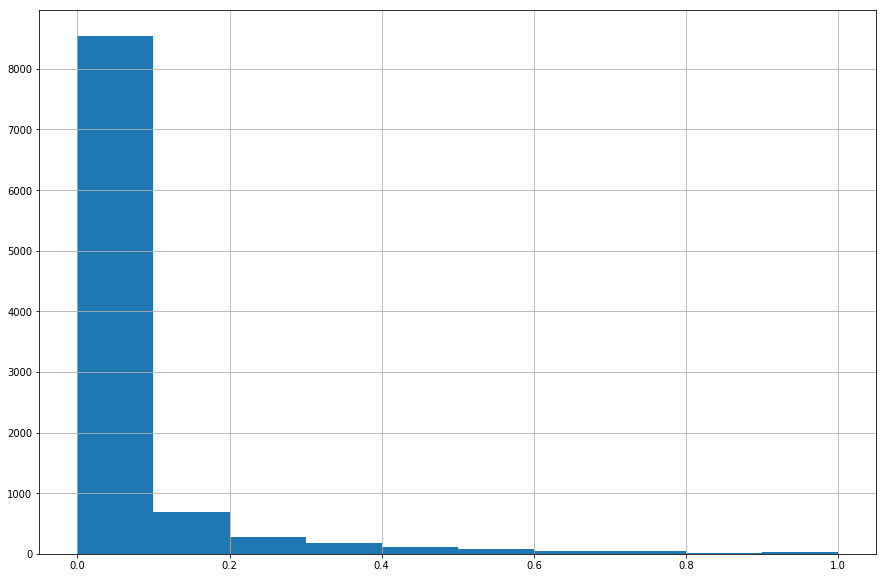

In [28]:
plt.figure(figsize=(15, 10))
experiment.hist();

In [29]:
(experiment < 0.05).mean()

0.77

A/A-тест

In [31]:
from scipy.stats import mannwhitneyu

In [35]:
result = []
for _ in tqdm(range(10_000)):
    a = np.random.binomial(1, baseline, size=sample_size)
    b = np.random.binomial(1, baseline, size=sample_size)
    _, pval = mannwhitneyu(a, b)
    result.append(pval)

100%|██████████| 10000/10000 [00:05<00:00, 1758.07it/s]


In [36]:
experiment = pd.Series(result)

In [37]:
(experiment < 0.05).mean()

0.0947

In [38]:
result = []
for _ in tqdm(range(10_000)):
    a = np.random.binomial(1, baseline, size=sample_size)
    b = np.random.binomial(1, baseline, size=sample_size)
    _, pval = proportions_ztest([a.sum(), b.sum()], [len(a), len(b)])
    result.append(pval)

100%|██████████| 10000/10000 [00:03<00:00, 3205.02it/s]


In [39]:
experiment = pd.Series(result)

In [40]:
(experiment < 0.05).mean()

0.0506

Размер выборки

In [41]:
import statsmodels.stats.api as sms
es = sms.proportion_effectsize(0.20, 0.25)
sms.NormalIndPower().solve_power(es, power=0.80, alpha=0.05, ratio=1)

1091.8961587171991

1/3

In [45]:
import statsmodels.stats.api as sms
es = sms.proportion_effectsize(0.20, 0.25)
sms.NormalIndPower().solve_power(es, power=0.80, alpha=0.05, ratio=1/3)

2183.792317429356

In [46]:
2183 / 3

727.6666666666666